# Sheet 7

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import torch
import torch.nn as nn
import scipy

# 1) Log-sum-exp and softmax

(a)

In [3]:
s1 = np.array([1,2,3])
s2 = np.array([11,12,13])
s3 = np.array([10,20,30])

print(scipy.special.softmax(s1))
print(scipy.special.softmax(s2))
print(scipy.special.softmax(s3))

[0.09003057 0.24472847 0.66524096]
[0.09003057 0.24472847 0.66524096]
[2.06106005e-09 4.53978686e-05 9.99954600e-01]


(i) constant offset <br>
$$ \begin{align*} 
\text{softmax}(\sigma, \lambda)_k &= \frac{exp(\lambda \sigma_k)}{\sum_{j=0}^K exp(\lambda \sigma_j)} \\
\text{softmax}(\sigma + c, \lambda)_k &= \frac{exp(\lambda \sigma_k +c)}{\sum_{j=0}^K exp(\lambda \sigma_j+c)} \\
&= \frac{exp(\lambda \sigma_k) exp(c)}{\sum_{j=0}^K exp(\lambda \sigma_j) exp(c)} \\
&= \frac{exp(c) exp(\lambda \sigma_k)}{exp(c) \big( \sum_{j=0}^K exp(\lambda \sigma_j) \big)} \\
&= \frac{exp(\lambda \sigma_k)}{\sum_{j=0}^K exp(\lambda \sigma_j)} \\
&= \text{softmax}(\sigma, \lambda)_k
\end{align*} $$

(ii) rescaling <br>
As seen in the calculations above, the softmax is not invariant for rescaling.

(b)

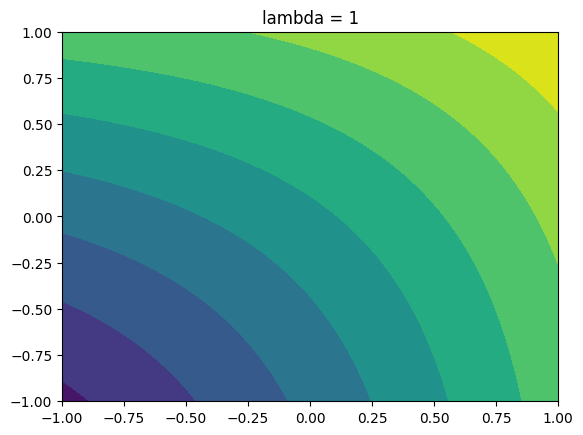

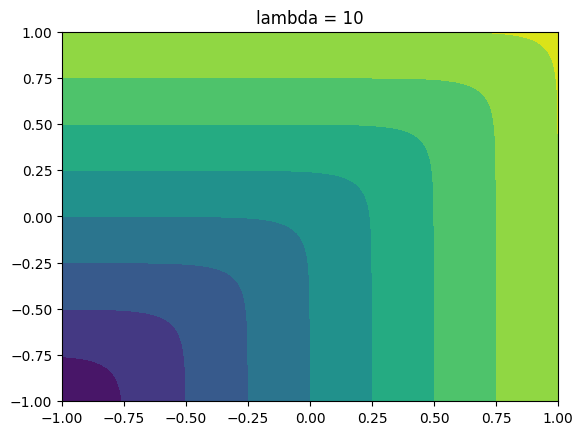

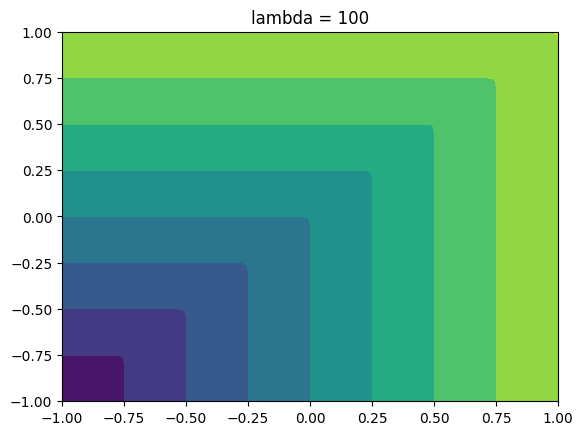

In [4]:
def logsumexp(x, lamb=1):
    # TODO: implement the logsumexp
    out = np.zeros(x[1].shape)
    for i in range(len(out[0])):
        for j in range(len(out[1])):
            out[i][j] = np.exp(lamb * x[0][i][j]) + np.exp(lamb * x[1][i][j])

    return 1/lamb * np.log(out)

# TODO: set up a grid of points in [-1, 1] x [-1, 1]
x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x, y)
    
# TODO: calculate and plot the functions as specified in the task
plt.contourf(X,Y, logsumexp(np.array([X,Y]), 1))
plt.title("lambda = 1")
plt.show()

plt.contourf(X,Y, logsumexp(np.array([X,Y]), 10))
plt.title("lambda = 10")
plt.show()

plt.contourf(X,Y, logsumexp(np.array([X,Y]), 100))
plt.title("lambda = 100")
plt.show()

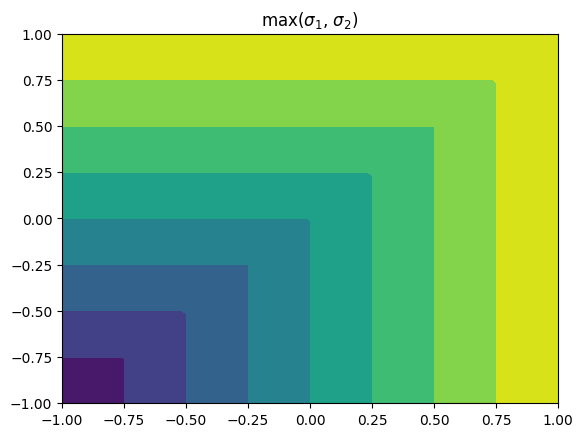

In [13]:
def max(x):
    # TODO: implement the logsumexp
    out = np.zeros(x[1].shape)
    for i in range(len(out[0])):
        for j in range(len(out[1])):
            out[i][j] = np.maximum(x[0][i][j], x[1][i][j])

    return out

plt.contourf(X,Y, max(np.array([X,Y])))
plt.title("max($\sigma_1$, $\sigma_2$)")
plt.show()

For bigger $\lambda$ the lse will converge the max function.

(c)

Text(0.5, 1.0, 'onehot $\\sigma_2$')

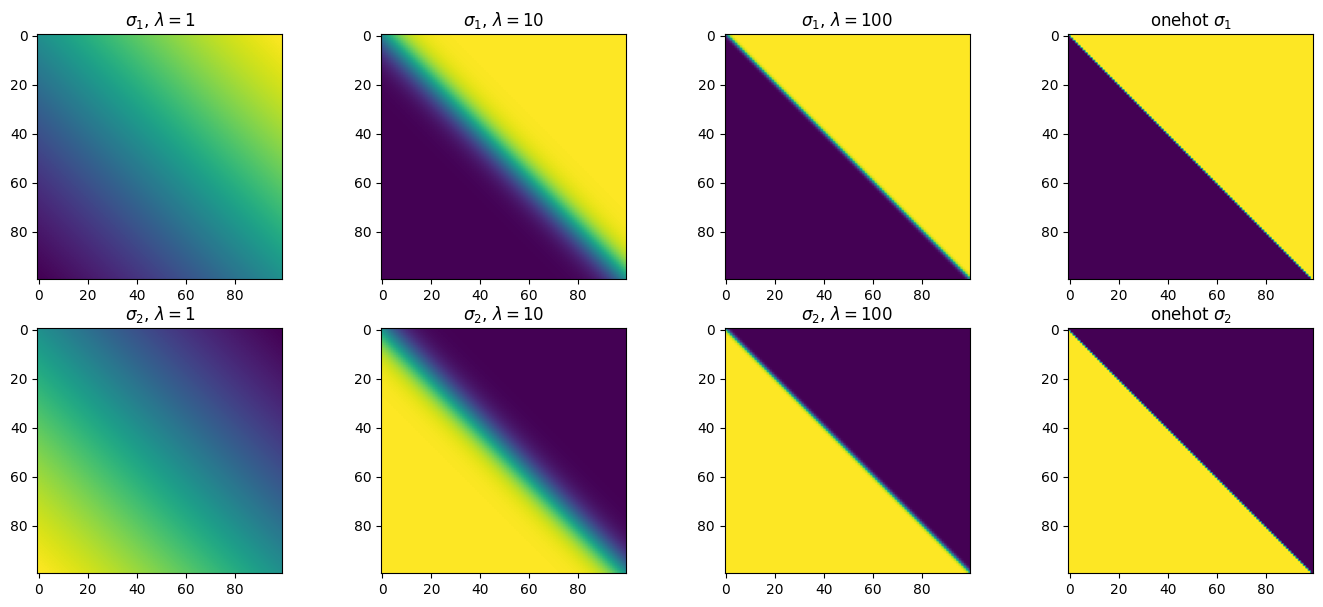

In [47]:
def softmax(x, axis, lamb=1):
    # TODO: implement the softmax function. Axis should specify along which axis the sums should be computed.
    out = np.zeros(x[1].shape)
    for i in range(len(out[0])):
        for j in range(len(out[1])):
            out[i][j] = np.exp(lamb * x[0][i][j]) + np.exp(lamb * x[1][i][j])

    return np.exp(lamb * x) / out

xy = softmax(np.array([X,Y]), axis=-1, lamb=1)

# TODO: compute the argmax of each gridpoint in one-hot form
def to_onehot(x):
    a = np.zeros(x.shape)
    b = np.zeros(x.shape)

    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            if x[i][j] == 0:
                a[i][j] = 1
            elif x[i][j] == 1:
                b[i][j] = 1

    return np.array([a, b])


one_hotted = to_onehot(np.argmax(xy, axis=0))

# TODO: make the plots as specified on the sheet (nicest is in a grid which you can get using plt.subplots)

# plot the softmax
fig, axs = plt.subplots(2, 4, figsize=(17, 7))
axs[0, 0].imshow( xy[0])
axs[0, 0].set_title("$\sigma_1$, $\lambda = 1$")
axs[1, 0].imshow( xy[1])
axs[1, 0].set_title("$\sigma_2$, $\lambda = 1$")
axs[0, 1].imshow( softmax(np.array([X,Y]), axis=-1, lamb=10)[0])
axs[0, 1].set_title("$\sigma_1$, $\lambda = 10$")
axs[1, 1].imshow( softmax(np.array([X,Y]), axis=-1, lamb=10)[1])
axs[1, 1].set_title("$\sigma_2$, $\lambda = 10$")
axs[0, 2].imshow( softmax(np.array([X,Y]), axis=-1, lamb=100)[0])
axs[0, 2].set_title("$\sigma_1$, $\lambda = 100$")
axs[1, 2].imshow( softmax(np.array([X,Y]), axis=-1, lamb=100)[1])
axs[1, 2].set_title("$\sigma_2$, $\lambda = 100$")
axs[0, 3].imshow( one_hotted[0])
axs[0, 3].set_title("onehot $\sigma_1$")
axs[1, 3].imshow( one_hotted[1])
axs[1, 3].set_title("onehot $\sigma_2$")

        
# plot the onehot argmax


(c)

$$ \begin{align*}
\frac{\partial}{\partial \sigma_i} \text{lse}(\sigma, \lambda) &= \frac{\partial}{\partial \sigma_i} \bigg(\frac{1}{\lambda} \log \sum_{j=0}^K exp(\lambda \sigma_j)\bigg)\\
&= \frac{1}{\lambda} \frac{1}{\sum_{j=0}^K exp(\lambda \sigma_j)} \frac{\partial}{\partial \sigma_i} \bigg( \sum_{j=0}^K exp(\lambda \sigma_j) \bigg)\\
&= \frac{1}{\lambda} \frac1{\sum_{j=0}^K exp(\lambda \sigma_j)} \lambda exp(\lambda \sigma_i) \\
&= \frac{exp(\lambda \sigma_i)}{\sum_{j=0}^K exp(\lambda \sigma_j)} \\
&= \text{softmax}(\sigma, \lambda)_i
\end{align*} $$

(d) 

$$ \begin{align*}
\lim_{\lambda \to \infty} \text{lse}(\sigma, \lambda) &= \lim_{\lambda \to \infty} \frac{1}{\lambda} \log \sum_{j=0}^K exp(\lambda \sigma_j) \\
\end{align*} $$

For $\lambda \to \infty$ the term $exp(\lambda \sigma_{max})$ will dominate the sum, which then can be rewritten as:

$$ \begin{align*}
 &= \frac{1}{\lambda} \log \big( exp(\lambda \sigma_{max}) \big) \\
    &= \frac{1}{\lambda} \big( \lambda \sigma_{max} \big) \\
    &= \sigma_{max}
\end{align*} $$
Which than equals the max function.